<a href="https://colab.research.google.com/github/Saif-crypt/Utilities-Boiler-Final/blob/main/boiler_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHASE 2: EFFICIENCY CALCULATION (Boiler Plant)

# STEP 1: Import Libraries

In [1]:
import pandas as pd
from google.colab import files

# STEP 2:Upload Phase 1 Processed Dataset

In [2]:
print("📤 Please upload the 'cleaned_boiler_data.csv' file from Phase 1:")
uploaded = files.upload()

📤 Please upload the 'cleaned_boiler_data.csv' file from Phase 1:


Saving cleaned_boiler_data.csv to cleaned_boiler_data.csv


# STEP 3:Get the filename and load the data

In [3]:
# This gets the name of the file you just uploaded
file_name = list(uploaded.keys())[0]
print(f"✅ File '{file_name}' uploaded successfully!")

# Load the data from the uploaded file
df = pd.read_csv(file_name, index_col='Date', parse_dates=['Date'])

print(f"✅ Data loaded! Shape: {df.shape}")

✅ File 'cleaned_boiler_data.csv' uploaded successfully!
✅ Data loaded! Shape: (33, 33)


#  STEP 4:Apply the Efficiency Formula Step-by-Step

In [4]:
print("\n" + "="*60)
print("CALCULATING EFFICIENCY")
print("="*60)

# Step 1: Calculate Conversion Rate
df['Conversion_Rate'] = df['ng_skid_converted'] / df['ng_skid_unconverted']
print("✅ Step 1 Complete: Conversion_Rate calculated.")

# Step 2: Calculate Total Corrected Fuel Consumption
df['Total_Fuel_Corrected'] = df['ng_meter_m3'] * df['Conversion_Rate']
print("✅ Step 2 Complete: Total_Fuel_Corrected calculated.")

# Step 3: Calculate Boiler Yield
df['Boiler_Yield'] = (df['boiler_steam_tons'] * 1000) / df['Total_Fuel_Corrected']
print("✅ Step 3 Complete: Boiler_Yield calculated.")

# Step 4: Calculate Efficiency %
enthalpy_steam = 667.1    # kcal/kg (from steam tables)
enthalpy_feedwater = 102  # kcal/kg (approx. for feedwater at 102°C)
calorific_value = 9450    # kcal/Nm³ (from your data)

df['Efficiency_%'] = (df['Boiler_Yield'] * (enthalpy_steam - enthalpy_feedwater) * 100) / calorific_value
print("✅ Step 4 Complete: Efficiency_% calculated.")


CALCULATING EFFICIENCY
✅ Step 1 Complete: Conversion_Rate calculated.
✅ Step 2 Complete: Total_Fuel_Corrected calculated.
✅ Step 3 Complete: Boiler_Yield calculated.
✅ Step 4 Complete: Efficiency_% calculated.


# STEP 5:Show Results

In [5]:
print("\n" + "="*60)
print("RESULTS")
print("="*60)

# Create a summary with key columns
results_df = df[[
    'ng_meter_m3',
    'ng_skid_converted',
    'ng_skid_unconverted',
    'Conversion_Rate',
    'Total_Fuel_Corrected',
    'boiler_steam_tons',
    'Boiler_Yield',
    'Efficiency_%',
    'Avg_NG_CV_kcal_per_Nm3'
]]

print("--- First 5 Rows with Calculations ---")
print(results_df.head())

print("\n--- Efficiency Summary ---")
print(f"Average Efficiency: {df['Efficiency_%'].mean():.2f}%")
print(f"Minimum Efficiency: {df['Efficiency_%'].min():.2f}%")
print(f"Maximum Efficiency: {df['Efficiency_%'].max():.2f}%")


RESULTS
--- First 5 Rows with Calculations ---
            ng_meter_m3  ng_skid_converted  ng_skid_unconverted  \
Date                                                              
2025-09-01         5275           34928.84                 8293   
2025-09-02         5219           37076.39                 8796   
2025-09-03         5082           38241.08                 9077   
2025-09-04         4000           25678.35                 6073   
2025-09-05         2754           11358.45                 2717   

            Conversion_Rate  Total_Fuel_Corrected  boiler_steam_tons  \
Date                                                                   
2025-09-01         4.211846          22217.488364                287   
2025-09-02         4.215142          21998.826672                287   
2025-09-03         4.212965          21410.286280                272   
2025-09-04         4.228281          16913.123662                219   
2025-09-05         4.180512          11513.128929 

# STEP 6: Save the Final Dataset

In [6]:
print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

output_file_path = 'boiler_data_with_efficiency.csv'
df.to_csv(output_file_path)
print(f"✅ SUCCESS: Phase 2 complete!")
print(f"✅ Final dataset saved as: '{output_file_path}'")


SAVING RESULTS
✅ SUCCESS: Phase 2 complete!
✅ Final dataset saved as: 'boiler_data_with_efficiency.csv'


# STEP 7:Download the result (optional)

In [7]:
# 7. Download the result (optional)
print("\n📥 Download the final CSV file:")
files.download(output_file_path)


📥 Download the final CSV file:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# STEP 8: Quick Plot of Efficiency Over Time

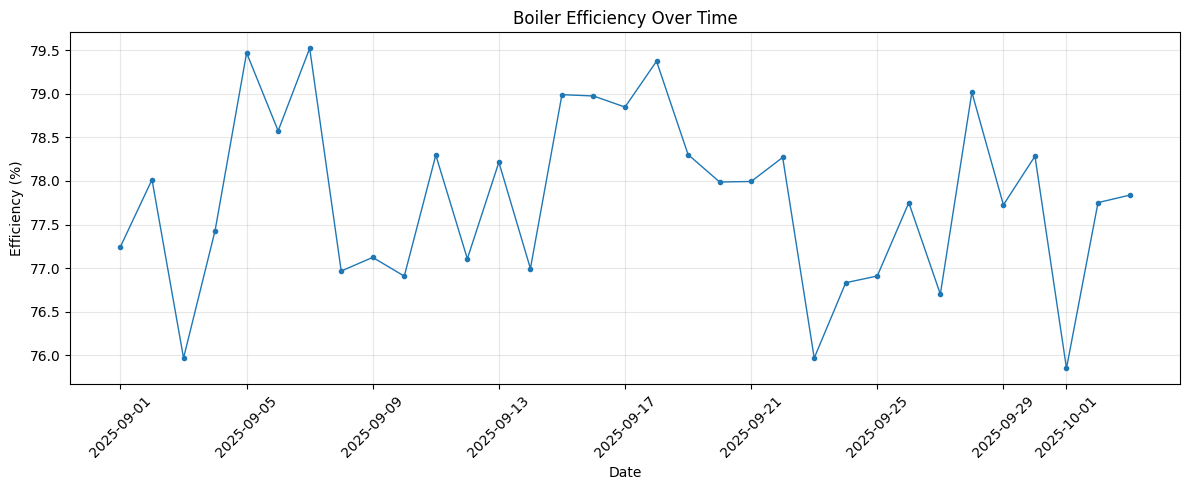


📈 Efficiency chart displayed. Ready for Phase 3: Analysis!


In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Efficiency_%'], marker='o', linestyle='-', linewidth=1, markersize=3)
plt.title('Boiler Efficiency Over Time')
plt.ylabel('Efficiency (%)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n📈 Efficiency chart displayed. Ready for Phase 3: Analysis!")

#